# Plotten mit Python

## Tipps zu Jupyter Notebooks

Zum Ausführen einer Zelle:
>STRG+ENTER : Bleibt in der Zelle

>SHIFT+ENTER : Geht zur nächsten Zelle

Arbeiten mit unbekannten Funktionen: Gehe mit dem Curser zum fraglichen Befehl
>SHIFT+TAB : Zeigt dir (falls möglich) eine Hilfe zum Befehl an

## Auf zum Plotten

In diesem Notebook wird ein rudimentäres Plotten mit Python gezeigt. Dabei sollten die zu plottenden Daten in einer Datei "daten.txt" gespeichert sein.(Du kannst die Datei natürlich auch im Skript beliebig anpassen!) Wir benutzen den Befehl [**numpy.loadtxt**](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) um die Datei einzulesen, daher muss die Datei passend formatiert sein. 

Hier beutzen wir das Format einer CSV-Datei (Comma-Separated-Values). Datenpunkte sind durch Kommata getrennt, alle Spalten müssen gleich viele Einträge haben, ein #-Symbol kommentiert eine Zeile aus. Man kann die Datenpunkte auch einfach mit Leerzeichen trennen, muss die Entscheidung dann aber später bei **loadtxt** berücksichtigen. 
```
#x, y, yerror
0, 0.2,  0.5
1, 0.9,  0.5
2, 3.7,  0.5
3, 9.2,  0.5
4, 15.5, 0.5
```
Wenn die Datei fertig ist, können wir uns das Python-Skript anschauen. Zuerst binden wir hier die sehr hilfreichen Bibliotheken **matplotlib.pyplot** und **numpy** ein, die uns alle notwendigen Funktionen bereitstellen:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Erstmal lesen wir die Datei ein und speichern die jeweiligen Zahlenreihen (Arrays) in den Variablen x, y, und yErr. Wenn du mehr oder weniger Datenpunkte einlesen möchtest, musst du den Code hier anpassen (Wenn z.B. keine y-Fehler dabei sind oder zusätzlich x-Fehler).

Der Parameter **delimiter** setzt fest, welches Symbol die Werte in der Datei trennt, standardmäßig ist es ein Leerzeichen. Wir haben aber grade eine CSV-Datei, also setzen wir ein Komma als Trenner fest.

In [28]:
inputfile = "linear.txt"
x    = np.loadtxt(inputfile, float, usecols=0, delimiter=",")
y    = np.loadtxt(inputfile, float, usecols=1, delimiter=",")
#yErr = np.loadtxt(inputfile, float, usecols=2, delimiter=",")
print(y)

[ 0.2  0.9  3.7  9.2 15.5]


## Einschub: eine Funktion zeichnen
Wir wollen außerdem noch eine beliebige Funktion unserem Plot hinzufügen können, dafür bereiten wir jetzt etwas vor. Im allgemeinen Skizzieren auch Computer eine Funktion, indem sie in einem Intervall $[A,B]$ aus der x-Achse $ N$ Datenpunkte wählen, die zugehörigen Werte f(x) ausrechnen und diese Punkte zeichnen und verbinden.

Wir erzeugen uns jetzt mithilfe von [**numpy.linspace**](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) ein Array aus $N$ Datenpunkten in gleichen Abständen zwischen $A$ und $B$. Um Konflikte mit den Benennungen zu vermeiden, nennen wir das mal xarray:

In [9]:
A = 0
B = 4
N = 20
xarray = np.linspace(A, B, N)
print(xarray)

[0.         0.21052632 0.42105263 0.63157895 0.84210526 1.05263158
 1.26315789 1.47368421 1.68421053 1.89473684 2.10526316 2.31578947
 2.52631579 2.73684211 2.94736842 3.15789474 3.36842105 3.57894737
 3.78947368 4.        ]


Jetzt definieren wir uns noch eine Funktion $f(x)$, die wir zeichnen wollen, zum Beispiel ein Polynom 2. Grades $f(x) = x^2$. Wenn wir dann f(xarray) ausrechnen, berechnet der Computer alle Funktionwerte, die wir später zum plotten der Funktion brauchen.

In [10]:
def f(x):
    return x**2
yarray = f(xarray)
print(yarray)

[ 0.          0.04432133  0.17728532  0.39889197  0.70914127  1.10803324
  1.59556787  2.17174515  2.8365651   3.5900277   4.43213296  5.36288089
  6.38227147  7.49030471  8.68698061  9.97229917 11.34626039 12.80886427
 14.3601108  16.        ]


## Einschub vorbei

Wir haben also nun einige Datensätze, einmal die eingelesenen $x, y, y_{Err}$ und die selbsterzeugten xarray und yarray.

Jetzt beginnen wir mit dem Plotten von Daten. Dazu benutzen wir hier die [Pyplot](https://matplotlib.org/api/pyplot_api.html)-Bibliothek. Leider muss der Block von **plt.figure()** bis **plt.show()** hier in Jupyter in einer Zelle zusammebleiben, damit alles funktioniert.

Wir legen erstmal eine neue Figur an, weisen nach belieben Achsenbeschriftung und ein Hintergrundgrid hinzu, beschriften die Achsen und, wenn es uns beliebt, geben wir der ganzen Figur einen Titel.

Anschließend fangen wir an, die Datenpunkte zu zeichnen. Pyplot hat hier ein paar verschiedene Funktionen, von denen uns hier nur **plot**, **scatter** und **errorbar** interessieren. [**plot**](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) zeichnet die Punkte mit verbindenden Linien zwischen den (im Array) aufeinanderfolgenden Punkten, [**scatter**](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html) malt uns Punkte, die nicht verbunden sind, und [**errorbar**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) malt uns den/die Fehlerbalken zu den Punkten. Zu all diesen Funktionen können noch weitere Parameter wie die Farbe, die Punktgröße usw. eingestellt werden, das sprengt hier aber den Rahmen. Einfach googlen wenn ihr es braucht.

Wir benutzen jetzt natürlich entsprechend unserer Problemstellung für das Plotten der Daten aus der Datei **scatter** und **errorbar** zusammen, und für das Malen der vorher gebastelten Funktion **plot**.

Der wichtigste Nebenparameter ist dann **label**, damit wir später die verschiedenen Plots in der selben Figur auseinanderhalten können, und **color**, welches offensichtlich die Farben kontrolliert. Manche Farben sind als Wörter (z.B. "blue") vorgespeichert, man kann aber auch die [Hexadezimaldarstellung](https://de.wikipedia.org/wiki/Hexadezimale_Farbdefinition) eines RGB-Codes nutzen (Bsp. Rot ist "#FF0000")

Zuletzt binden wir noch die [Legende](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) ein, um die Label in der Figur anzuzeigen, [speichern](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) die Figur und lassen sie uns anzeigen.

Man kann natürlich grade unerwünschte Zeilen einfach auskommentieren, wenn man beispielsweise keine Messfehler hat oder keine Funktion malen möchte.

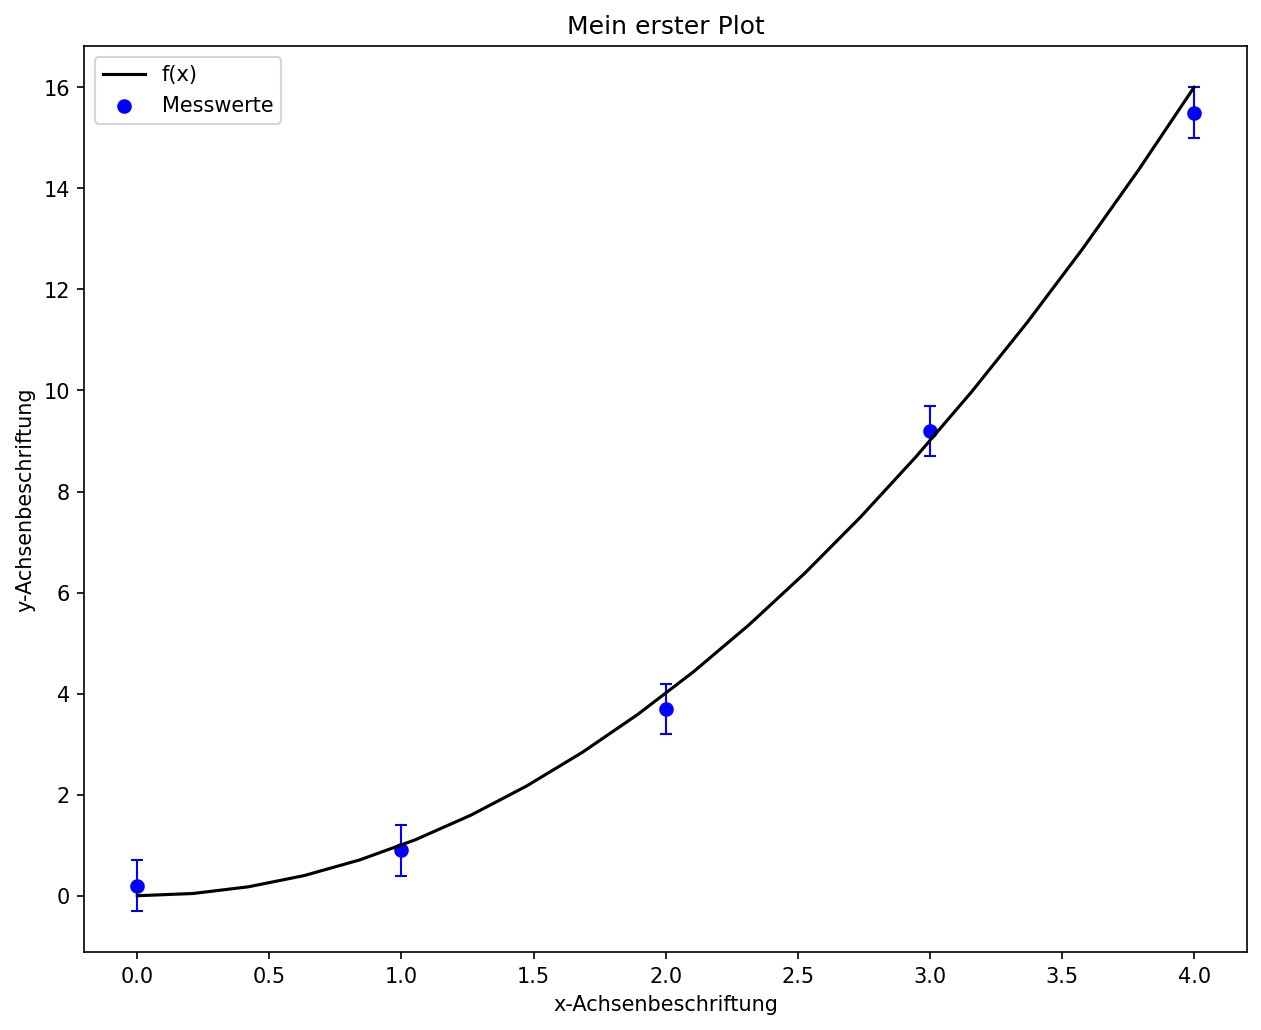

In [26]:
# Beginne neues Objekt mit Spezifizierter Größe, hier 10,8
plt.figure(figsize=(10,8),dpi=150)
# Darstellung der Achsen und eines Gitters im Hintergrund
# Grobes Gitter
#plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.6)
# Feineres Gitter
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# Festlegung der Achsenbeschriftungen
plt.xlabel("x-Achsenbeschriftung")
plt.ylabel("y-Achsenbeschriftung")

# Titel für den Plot
plt.title("Mein erster Plot")



# Darstellung der Messwerte
plt.scatter(x,y, label="Messwerte", color='blue')
# Darstellung der Fehlerwerte
plt.errorbar(x,y,yerr=yErr, fmt= 'none', ecolor='blue', elinewidth=1,capsize=3, capthick=1)

# Darstellung der berechneten Funktionswerte
plt.plot(xarray,yarray, label="f(x)", color='black')



# Darstellung der Legende am Ort oben links
plt.legend(loc="upper left")
# Speichere den Plot (Dateityp ist relativ frei wählbar, z.B. png, pdf, svg, usw.) 
# Die Funktion kann aus der Benennung das gewünschte Format bestimmen, default ist png
plt.savefig("plot.pdf")
# Finale Darstellung aller Elemente
plt.show()


Wenn man jetzt eine Funktion möglichst passend durch die Messwerte legen will, muss man natürlich Fitten. Das ist aber in einem anderen Notebook erläutert.

## Endnotizen
- Die hier benutzten Funktionen sind natürlich noch weitaus vielfältiger, wenn man sich mit ihnen tiefergehend auseinandersetzt, im Laufe des Praktikums solltest du gerne etwas herumprobieren, um die schönstmöglichen Plots zu kreieren
- Ein vernünftiger Funktionsplot endet nicht innerhalb der Figur(außer die Funktion ist undefiniert). Versuche doch mal, mithilfe von [plt.xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html) und der Definition von $A$ und $B$ weiter oben die Grenzen des Plots so zu verschieben, dass der Funktionsgraph in der gesamten Figur abgebildet ist
- Man kann über das aktuelle Anforderungsniveau hier auch hinausgehen und bei passenden Problemstellungen multiple Plots gleichzeitig erzeugen, was unter Umständen Dinge einleuchtender darstellt als zu viele Plots in einen Graphen zu malen, dass ist dann deine Entscheidung. [Hier](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) kannst du dich einlesen, falls dir mal langweilig ist und du spielen möchtest